In [1]:
#Data analyses
#time to analize the data

In [2]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [3]:
#create data structure
train = pd.read_csv('Train_UWu5bXk.csv')
test = pd.read_csv('Test_u94Q5KV.csv')

In [4]:
#Step 1 Variable id
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [6]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
#At this point it looks like we have Item_Outlet_Sales as our variable of interest
#some variables that are item related and variables that are outlet related

In [10]:
#define variable exploration function
def is_catagorical(series):
    try:
        if series.describe()['unique']:
            return True
        else:
            return False
    except:
        return False
def uni_analysis(df):
    is_catagorical_table ={}
    print('Features are :')
    print(df.columns)
    for var in df.columns:
        print('-------------------------------------------------')
        print('                     {}                          '.format(var))
        print('-------------------------------------------------')
        
        feature = df[var]
        print('Feature breakdown: ')
        print(feature.describe())
        print('nulls : {}'.format(feature.isnull().sum()))
        if is_catagorical(feature):
            is_catagorical_table[var] = True
            print(feature.value_counts(normalize=True)*100)
            fig = plt.plot()
            feature.value_counts().plot(kind='bar')
        else:
            is_catagorical_table[var] = False
            fig, axes = plt.subplots(1,2)
            target1 = [axes[0]]
            target2 = [axes[1]]
            feature.plot(subplots=True, ax=target1, kind='hist')
            feature.plot(subplots=True, ax=target2, kind='box')
        plt.show()
    return is_catagorical_table

Features are :
Index(['Item_Outlet_Sales', 'Item_Weight', 'Item_Fat_Content',
       'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')
-------------------------------------------------
                     Item_Outlet_Sales                          
-------------------------------------------------
Feature breakdown: 
count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64
nulls : 0


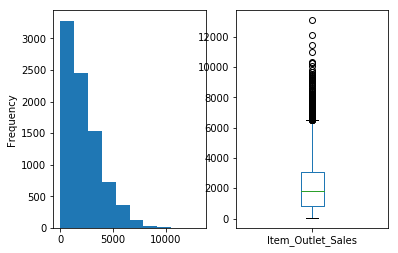

-------------------------------------------------
                     Item_Weight                          
-------------------------------------------------
Feature breakdown: 
count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64
nulls : 1463


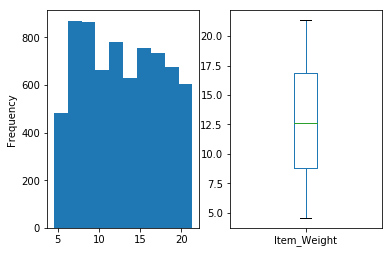

-------------------------------------------------
                     Item_Fat_Content                          
-------------------------------------------------
Feature breakdown: 
count        8523
unique          5
top       Low Fat
freq         5089
Name: Item_Fat_Content, dtype: object
nulls : 0
Low Fat    59.709023
Regular    33.896515
LF          3.707615
reg         1.372756
low fat     1.314091
Name: Item_Fat_Content, dtype: float64


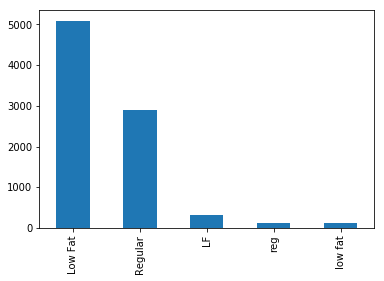

-------------------------------------------------
                     Item_Visibility                          
-------------------------------------------------
Feature breakdown: 
count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64
nulls : 0


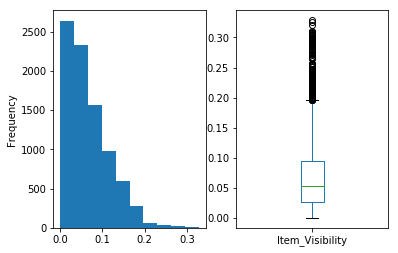

-------------------------------------------------
                     Item_Type                          
-------------------------------------------------
Feature breakdown: 
count                      8523
unique                       16
top       Fruits and Vegetables
freq                       1232
Name: Item_Type, dtype: object
nulls : 0
Fruits and Vegetables    14.455004
Snack Foods              14.079549
Household                10.676992
Frozen Foods             10.043412
Dairy                     8.001877
Canned                    7.614690
Baking Goods              7.602957
Health and Hygiene        6.101138
Soft Drinks               5.221166
Meat                      4.986507
Breads                    2.944972
Hard Drinks               2.510853
Others                    1.982870
Starchy Foods             1.736478
Breakfast                 1.290625
Seafood                   0.750909
Name: Item_Type, dtype: float64


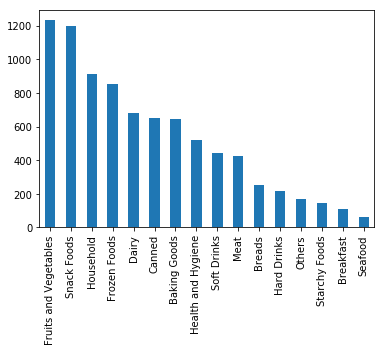

-------------------------------------------------
                     Item_MRP                          
-------------------------------------------------
Feature breakdown: 
count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64
nulls : 0


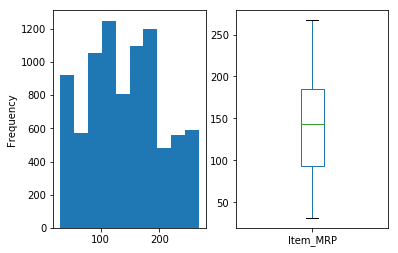

-------------------------------------------------
                     Outlet_Identifier                          
-------------------------------------------------
Feature breakdown: 
count       8523
unique        10
top       OUT027
freq         935
Name: Outlet_Identifier, dtype: object
nulls : 0
OUT027    10.970316
OUT013    10.935117
OUT035    10.911651
OUT046    10.911651
OUT049    10.911651
OUT045    10.899918
OUT018    10.888185
OUT017    10.864719
OUT010     6.511792
OUT019     6.195002
Name: Outlet_Identifier, dtype: float64


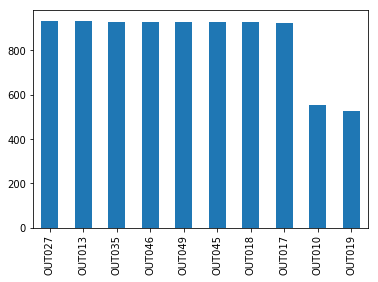

-------------------------------------------------
                     Outlet_Establishment_Year                          
-------------------------------------------------
Feature breakdown: 
count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64
nulls : 0


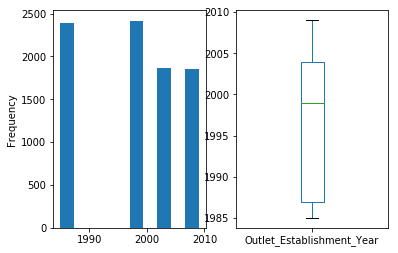

-------------------------------------------------
                     Outlet_Size                          
-------------------------------------------------
Feature breakdown: 
count       6113
unique         3
top       Medium
freq        2793
Name: Outlet_Size, dtype: object
nulls : 2410
Medium    45.689514
Small     39.064289
High      15.246197
Name: Outlet_Size, dtype: float64


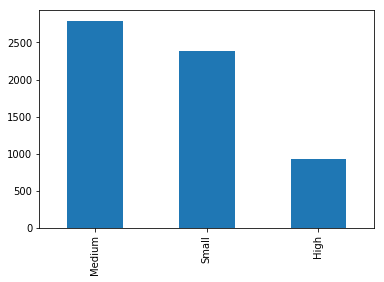

-------------------------------------------------
                     Outlet_Location_Type                          
-------------------------------------------------
Feature breakdown: 
count       8523
unique         3
top       Tier 3
freq        3350
Name: Outlet_Location_Type, dtype: object
nulls : 0
Tier 3    39.305409
Tier 2    32.676288
Tier 1    28.018303
Name: Outlet_Location_Type, dtype: float64


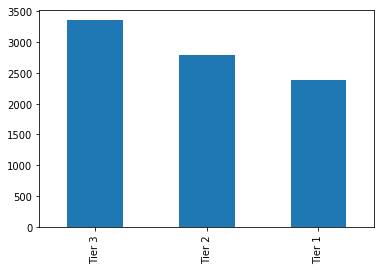

-------------------------------------------------
                     Outlet_Type                          
-------------------------------------------------
Feature breakdown: 
count                  8523
unique                    4
top       Supermarket Type1
freq                   5577
Name: Outlet_Type, dtype: object
nulls : 0
Supermarket Type1    65.434706
Grocery Store        12.706793
Supermarket Type3    10.970316
Supermarket Type2    10.888185
Name: Outlet_Type, dtype: float64


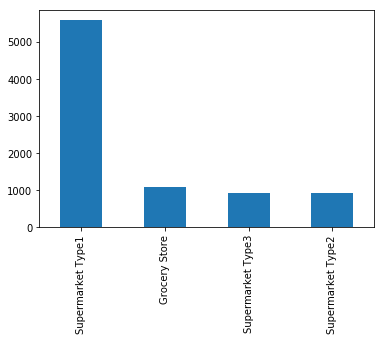

In [11]:
is_cat = uni_analysis(train)

In [12]:
#Notes on features uni analysis
"""
    Item Weight -- seems farley uniform distribution no outliers
    Item_Fat_Content -- more low fat then regular need mapiulation to recombine cols
    Item_vis -- %of item in store display left trending probs a corelation
    Item_type -- diff catagories may need to break into these cats first to analise
    Item_MRP -- uniformally distributed not important atm
    Out_let_Id -- gives the diffs out let could be interesting seeing this and item_type
    Outslet_estab_year -- might combine with Outlet_id well
    Outlet_size -- prety standard left tranding
    Location type -- another catagory
    Outlet_type -- mostly supermarket type 1
    Item_sales -- highly left trending with many outliers
"""

'\n    Item Weight -- seems farley uniform distribution no outliers\n    Item_Fat_Content -- more low fat then regular need mapiulation to recombine cols\n    Item_vis -- %of item in store display left trending probs a corelation\n    Item_type -- diff catagories may need to break into these cats first to analise\n    Item_MRP -- uniformally distributed not important atm\n    Out_let_Id -- gives the diffs out let could be interesting seeing this and item_type\n    Outslet_estab_year -- might combine with Outlet_id well\n    Outlet_size -- prety standard left tranding\n    Location type -- another catagory\n    Outlet_type -- mostly supermarket type 1\n    Item_sales -- highly left trending with many outliers\n'

In [ ]:
#clean data for comparison

#remap train to get sales first
train = pd.concat([train['Item_Outlet_Sales'], train.drop('Item_Outlet_Sales', 1)], axis=1)

#save item ids and drop them for analysis
item_ids = train['Item_Identifier']
train.drop('Item_Identifier', 1, inplace=True)


In [25]:
# clean item fat content
print(train['Item_Fat_Content'].unique())
print(train['Item_Fat_Content'].shape[0])
train['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF':'Low Fat', 'reg': 'Regular'}, regex=True, inplace=True)
print(train['Item_Fat_Content'].unique())
print(train['Item_Fat_Content'].shape[0])

['Low Fat' 'Regular']
8523
['Low Fat' 'Regular']
8523


In [ ]:
#multivarient analysis


In [26]:
train.head()

,Item_Outlet_Sales,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,3735.1380,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,443.4228,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,2097.2700,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,732.3800,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,994.7052,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [27]:
def my_anova(df, cat_var, cont_var):
    #Dependencies
    #from scipy import stats
    from scipy import stats
    uniques = [x for x in df[cat_var].unique() if str(x) != 'nan']
    anova_list = {}
    for var in uniques:
        anova_list[var] = [x for x in df[df[cat_var] == var][cont_var].values if str(x) != 'nan']
    F, p = stats.f_oneway(*anova_list.values())
    print('F = {}'.format(F))
    print('p = {}'.format(p))

def my_multi_box(df, var_cat, var_cont):
    
    df_two_var=df[[var_cat, var_cont]]
    df_two_var= df_two_var.pivot(columns=df_two_var.columns[0], index = df_two_var.index)
    df_two_var.columns = df_two_var.columns.droplevel()
    if len(df_two_var.columns) > 25:
        print('To many cols')
        return
    #print('debug: cols {}'.format(df_two_var.columns))
    for val in df_two_var.columns:
        percent_str = round((df[df[var_cat]==val].shape[0]/df[var_cat].shape[0])*100,2)
        df_two_var.rename(columns={val:"{} ({})".format(val, percent_str)}, inplace=True)
    df_two_var.boxplot()
    plt.show()    

def multi_analysis(df, cat_table):
    #Prints comparisons of variables and returns a table of which vars are related
    for ix, var1 in enumerate(df.columns):
        for ij, var2 in enumerate(df.columns):
            if ij > ix:
                print("------------------------------------")
                print("{} compared to {}".format(var1, var2))
                print("------------------------------------")
                if cat_table[var1] is True:
                    if cat_table[var2] is True:
                        #cat vs cat
                        print('Catagorical vs Catagorical\n')
                        print("{}\t\t{}".format(var1, var2))
                        for val in filter(lambda x: str(x) != 'nan', train[var1].unique()):
                            
                            group = train[train[var1]==val]
                            print('{} %{:.0f}'.format(val, (group.shape[0]/train.shape[0])*100))
                            for status in filter(lambda x : str(x) != 'nan', train[var2].unique()):
                                subgroup = group[group[var2]==status]
                                print('\t\t {} %{:.0f}'.format(status, (subgroup.shape[0]/group.shape[0])*100))
                                
                        group = df.groupby([var1, var2])
                        group.size().unstack().plot(kind='bar',stacked=True)
                        plt.show()
                    else:
                        print('Catagorical vs Continuous')
                        my_anova(df, var1, var2)
                        my_multi_box(df, var1, var2)
                else:
                    if cat_table[var2] is True: 
                        print('Catagorical vs Continuous')
                        my_anova(df, var2, var1)
                        my_multi_box(df, var2, var1)
                    else:
                        print('Continous vs Continous')
                        print('Correlation: {}'.format(df[var1].corr(df[var2])))
                        plt.scatter(df[var1], df[var2])
                        plt.show()

------------------------------------
Item_Outlet_Sales compared to Item_Weight
------------------------------------
Continous vs Continous
Correlation: 0.014122739280056466


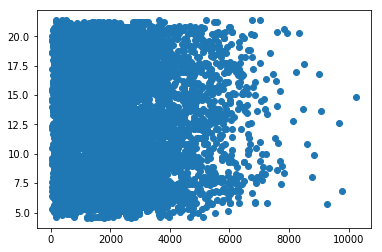

------------------------------------
Item_Outlet_Sales compared to Item_Fat_Content
------------------------------------
Catagorical vs Continuous
F = 2.9866642901573286
p = 0.08398916967694944


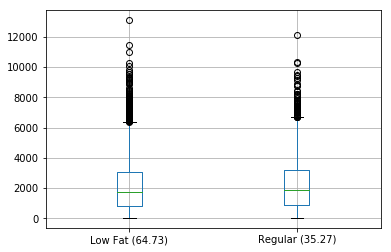

------------------------------------
Item_Outlet_Sales compared to Item_Visibility
------------------------------------
Continous vs Continous
Correlation: -0.12862461222077032


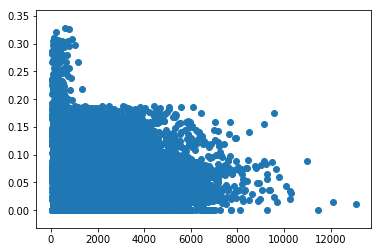

------------------------------------
Item_Outlet_Sales compared to Item_Type
------------------------------------
Catagorical vs Continuous
F = 2.700653287521041
p = 0.00038843993766501125


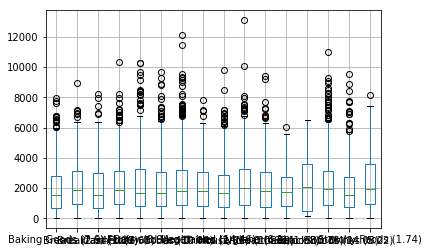

------------------------------------
Item_Outlet_Sales compared to Item_MRP
------------------------------------
Continous vs Continous
Correlation: 0.5675744466569194


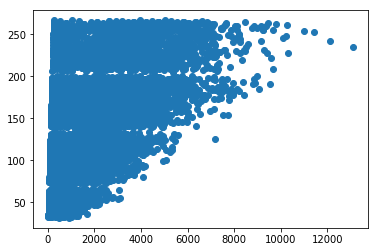

------------------------------------
Item_Outlet_Sales compared to Outlet_Identifier
------------------------------------
Catagorical vs Continuous
F = 300.0791353284904
p = 0.0


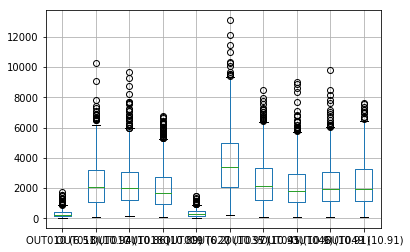

------------------------------------
Item_Outlet_Sales compared to Outlet_Establishment_Year
------------------------------------
Continous vs Continous
Correlation: -0.04913497044082088


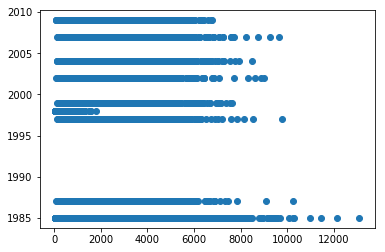

------------------------------------
Item_Outlet_Sales compared to Outlet_Size
------------------------------------
Catagorical vs Continuous
F = 131.09669439861298
p = 1.791274552101179e-56


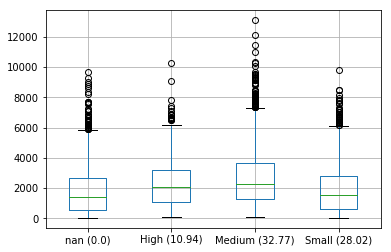

------------------------------------
Item_Outlet_Sales compared to Outlet_Location_Type
------------------------------------
Catagorical vs Continuous
F = 53.94773987456066
p = 5.2228172988842975e-24


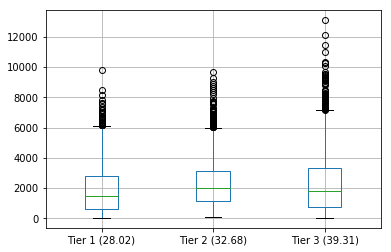

------------------------------------
Item_Outlet_Sales compared to Outlet_Type
------------------------------------
Catagorical vs Continuous
F = 894.6500119018008
p = 0.0


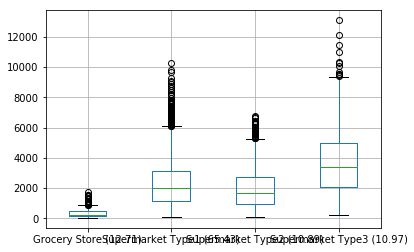

------------------------------------
Item_Weight compared to Item_Fat_Content
------------------------------------
Catagorical vs Continuous
F = 3.8133702832965275
p = 0.05088451503405356


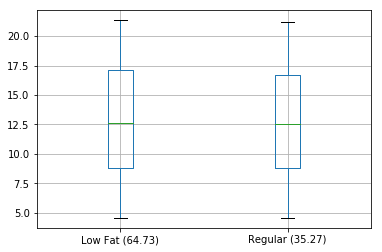

------------------------------------
Item_Weight compared to Item_Visibility
------------------------------------
Continous vs Continous
Correlation: -0.014047725947827286


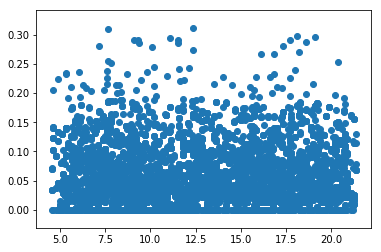

------------------------------------
Item_Weight compared to Item_Type
------------------------------------
Catagorical vs Continuous
F = 7.509144532267339
p = 7.114172258019493e-17


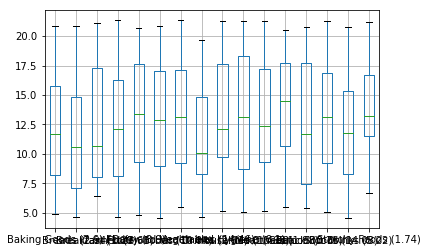

------------------------------------
Item_Weight compared to Item_MRP
------------------------------------
Continous vs Continous
Correlation: 0.027141153883330573


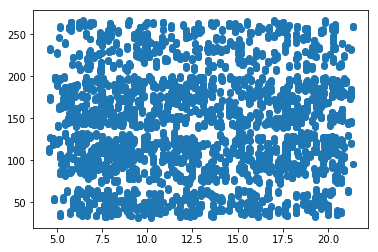

------------------------------------
Item_Weight compared to Outlet_Identifier
------------------------------------
Catagorical vs Continuous
F = nan
p = nan


c:\python\python35\lib\site-packages\scipy\stats\stats.py:2958: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / float(len(a))


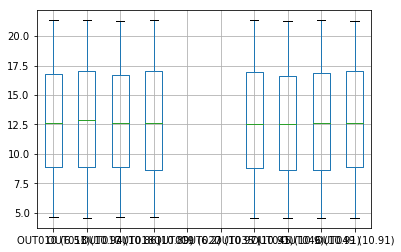

------------------------------------
Item_Weight compared to Outlet_Establishment_Year
------------------------------------
Continous vs Continous
Correlation: -0.011588290193829096


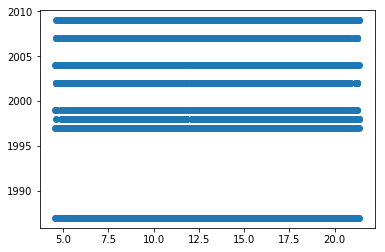

------------------------------------
Item_Weight compared to Outlet_Size
------------------------------------
Catagorical vs Continuous
F = 0.35618837427338107
p = 0.7003598003125647


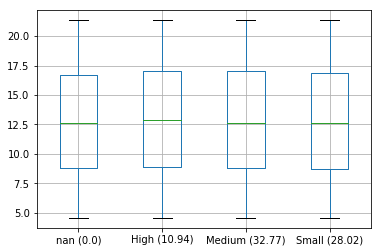

------------------------------------
Item_Weight compared to Outlet_Location_Type
------------------------------------
Catagorical vs Continuous
F = 0.8873153564202639
p = 0.4118056319373695


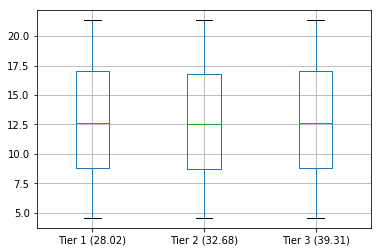

------------------------------------
Item_Weight compared to Outlet_Type
------------------------------------
Catagorical vs Continuous
F = nan
p = nan


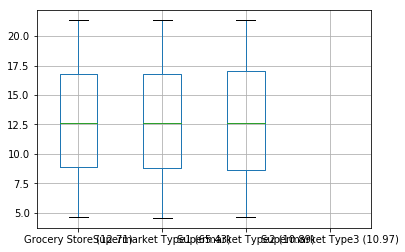

------------------------------------
Item_Fat_Content compared to Item_Visibility
------------------------------------
Catagorical vs Continuous
F = 19.118323229914154
p = 1.2431899571070498e-05


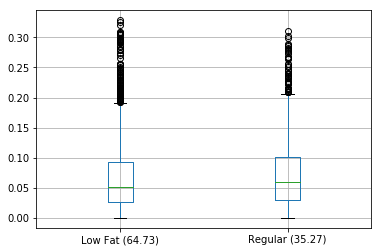

------------------------------------
Item_Fat_Content compared to Item_Type
------------------------------------
Catagorical vs Catagorical

Item_Fat_Content		Item_Type
Low Fat %65
		 Dairy %8
		 Soft Drinks %7
		 Meat %3
		 Fruits and Vegetables %11
		 Household %16
		 Baking Goods %6
		 Snack Foods %13
		 Frozen Foods %8
		 Breakfast %1
		 Health and Hygiene %9
		 Hard Drinks %4
		 Canned %6
		 Breads %3
		 Starchy Foods %1
		 Others %3
		 Seafood %1
Regular %35
		 Dairy %9
		 Soft Drinks %2
		 Meat %8
		 Fruits and Vegetables %20
		 Household %0
		 Baking Goods %11
		 Snack Foods %17
		 Frozen Foods %14
		 Breakfast %2
		 Health and Hygiene %0
		 Hard Drinks %0
		 Canned %10
		 Breads %4
		 Starchy Foods %2
		 Others %0
		 Seafood %1


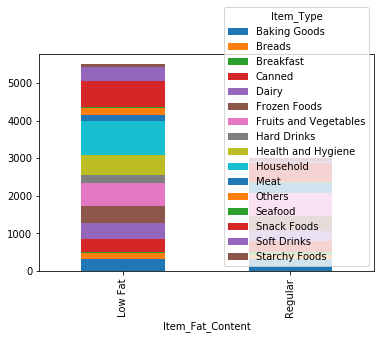

------------------------------------
Item_Fat_Content compared to Item_MRP
------------------------------------
Catagorical vs Continuous
F = 0.3132328117606832
p = 0.575717856051471


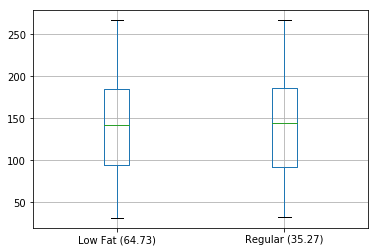

------------------------------------
Item_Fat_Content compared to Outlet_Identifier
------------------------------------
Catagorical vs Catagorical

Item_Fat_Content		Outlet_Identifier
Low Fat %65
		 OUT049 %11
		 OUT018 %11
		 OUT010 %7
		 OUT013 %11
		 OUT027 %11
		 OUT045 %11
		 OUT017 %11
		 OUT046 %11
		 OUT035 %11
		 OUT019 %6
Regular %35
		 OUT049 %11
		 OUT018 %11
		 OUT010 %7
		 OUT013 %11
		 OUT027 %11
		 OUT045 %11
		 OUT017 %11
		 OUT046 %11
		 OUT035 %11
		 OUT019 %6


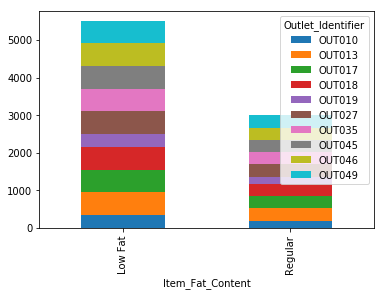

------------------------------------
Item_Fat_Content compared to Outlet_Establishment_Year
------------------------------------
Catagorical vs Continuous
F = 0.08458607664764846
p = 0.7711831746337232


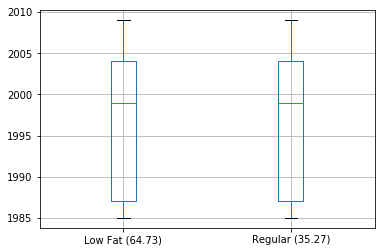

------------------------------------
Item_Fat_Content compared to Outlet_Size
------------------------------------
Catagorical vs Catagorical

Item_Fat_Content		Outlet_Size
Low Fat %65
		 Medium %33
		 High %11
		 Small %28
Regular %35
		 Medium %33
		 High %11
		 Small %28


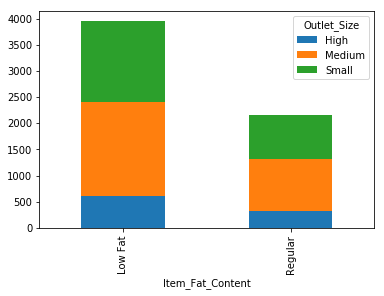

------------------------------------
Item_Fat_Content compared to Outlet_Location_Type
------------------------------------
Catagorical vs Catagorical

Item_Fat_Content		Outlet_Location_Type
Low Fat %65
		 Tier 1 %28
		 Tier 3 %39
		 Tier 2 %33
Regular %35
		 Tier 1 %28
		 Tier 3 %39
		 Tier 2 %32


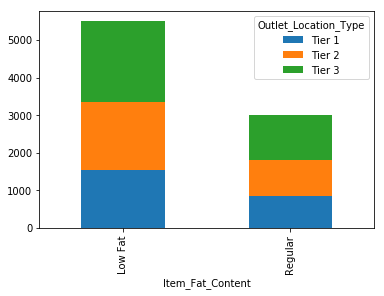

------------------------------------
Item_Fat_Content compared to Outlet_Type
------------------------------------
Catagorical vs Catagorical

Item_Fat_Content		Outlet_Type
Low Fat %65
		 Supermarket Type1 %65
		 Supermarket Type2 %11
		 Grocery Store %13
		 Supermarket Type3 %11
Regular %35
		 Supermarket Type1 %65
		 Supermarket Type2 %11
		 Grocery Store %13
		 Supermarket Type3 %11


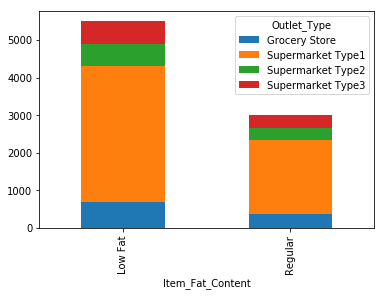

------------------------------------
Item_Visibility compared to Item_Type
------------------------------------
Catagorical vs Continuous
F = 4.750905142645759
p = 2.9369316360250295e-09


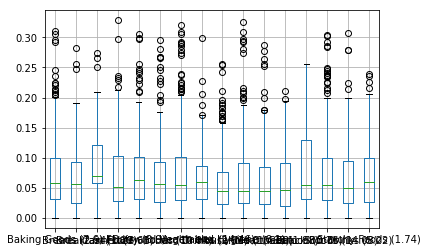

------------------------------------
Item_Visibility compared to Item_MRP
------------------------------------
Continous vs Continous
Correlation: -0.0013148480362671702


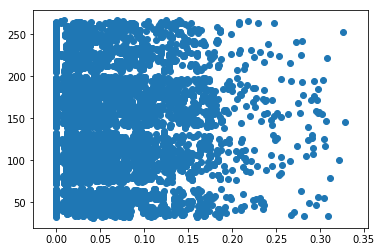

------------------------------------
Item_Visibility compared to Outlet_Identifier
------------------------------------
Catagorical vs Continuous
F = 85.42922990972828
p = 1.0285723110743669e-152


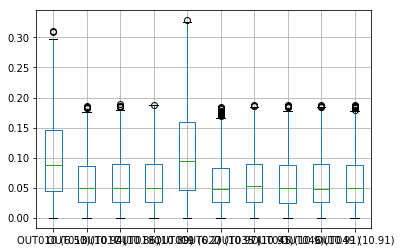

------------------------------------
Item_Visibility compared to Outlet_Establishment_Year
------------------------------------
Continous vs Continous
Correlation: -0.07483350421024719


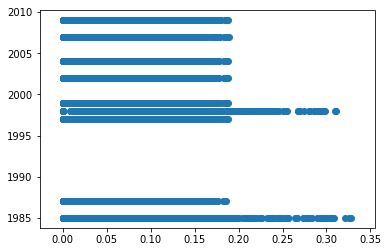

------------------------------------
Item_Visibility compared to Outlet_Size
------------------------------------
Catagorical vs Continuous
F = 37.39192633593295
p = 7.235509781262994e-17


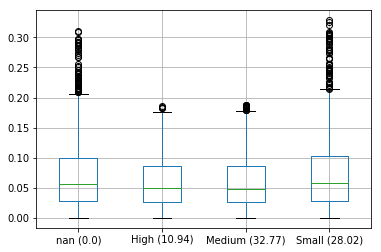

------------------------------------
Item_Visibility compared to Outlet_Location_Type
------------------------------------
Catagorical vs Continuous
F = 25.50263148543972
p = 9.06501507948925e-12


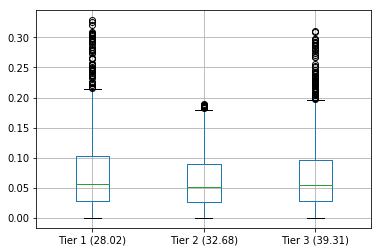

------------------------------------
Item_Visibility compared to Outlet_Type
------------------------------------
Catagorical vs Continuous
F = 254.30677497171652
p = 4.5932234924663505e-158


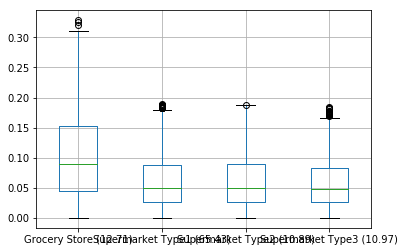

------------------------------------
Item_Type compared to Item_MRP
------------------------------------
Catagorical vs Continuous
F = 7.161792975048157
p = 6.514365010860178e-16


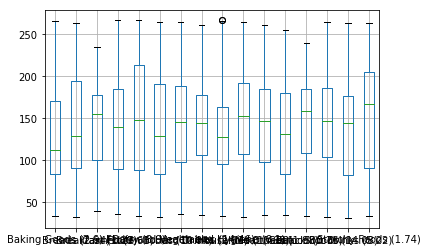

------------------------------------
Item_Type compared to Outlet_Identifier
------------------------------------
Catagorical vs Catagorical

Item_Type		Outlet_Identifier
Dairy %8
		 OUT049 %11
		 OUT018 %11
		 OUT010 %6
		 OUT013 %12
		 OUT027 %10
		 OUT045 %10
		 OUT017 %11
		 OUT046 %11
		 OUT035 %10
		 OUT019 %7
Soft Drinks %5
		 OUT049 %10
		 OUT018 %10
		 OUT010 %6
		 OUT013 %11
		 OUT027 %10
		 OUT045 %11
		 OUT017 %12
		 OUT046 %11
		 OUT035 %12
		 OUT019 %6
Meat %5
		 OUT049 %11
		 OUT018 %11
		 OUT010 %8
		 OUT013 %10
		 OUT027 %13
		 OUT045 %9
		 OUT017 %10
		 OUT046 %10
		 OUT035 %10
		 OUT019 %8
Fruits and Vegetables %14
		 OUT049 %11
		 OUT018 %11
		 OUT010 %6
		 OUT013 %12
		 OUT027 %11
		 OUT045 %12
		 OUT017 %10
		 OUT046 %10
		 OUT035 %10
		 OUT019 %6
Household %11
		 OUT049 %10
		 OUT018 %10
		 OUT010 %7
		 OUT013 %11
		 OUT027 %11
		 OUT045 %11
		 OUT017 %10
		 OUT046 %11
		 OUT035 %11
		 OUT019 %6
Baking Goods %8
		 OUT049 %10
		 OUT018 %10
		 OUT010 %6
		 OUT013 %

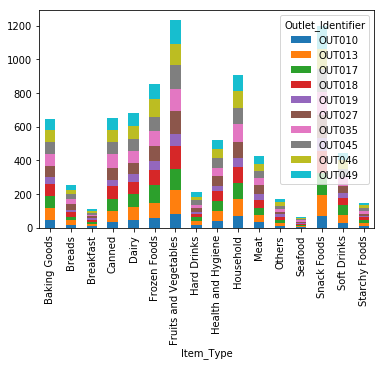

------------------------------------
Item_Type compared to Outlet_Establishment_Year
------------------------------------
Catagorical vs Continuous
F = 0.4082003010098847
p = 0.9775620378229264


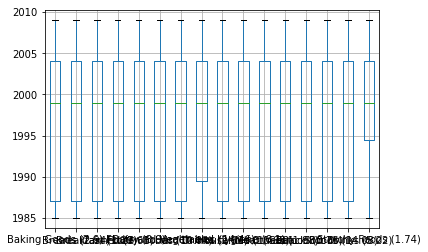

------------------------------------
Item_Type compared to Outlet_Size
------------------------------------
Catagorical vs Catagorical

Item_Type		Outlet_Size
Dairy %8
		 Medium %32
		 High %12
		 Small %29
Soft Drinks %5
		 Medium %31
		 High %11
		 Small %28
Meat %5
		 Medium %35
		 High %10
		 Small %28
Fruits and Vegetables %14
		 Medium %34
		 High %12
		 Small %27
Household %11
		 Medium %32
		 High %11
		 Small %28
Baking Goods %8
		 Medium %31
		 High %11
		 Small %29
Snack Foods %14
		 Medium %34
		 High %10
		 Small %28
Frozen Foods %10
		 Medium %32
		 High %11
		 Small %29
Breakfast %1
		 Medium %33
		 High %12
		 Small %27
Health and Hygiene %6
		 Medium %33
		 High %12
		 Small %26
Hard Drinks %3
		 Medium %35
		 High %11
		 Small %23
Canned %8
		 Medium %33
		 High %10
		 Small %29
Breads %3
		 Medium %33
		 High %10
		 Small %28
Starchy Foods %2
		 Medium %32
		 High %13
		 Small %26
Others %2
		 Medium %31
		 High %9
		 Small %33
Seafood %1
		 Medium %33
		 High %8
		 

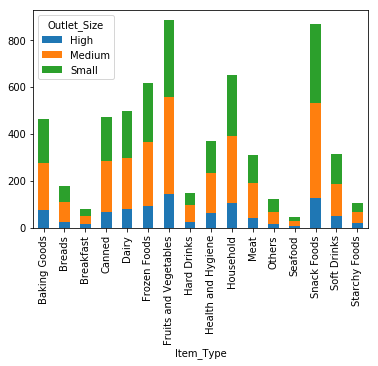

------------------------------------
Item_Type compared to Outlet_Location_Type
------------------------------------
Catagorical vs Catagorical

Item_Type		Outlet_Location_Type
Dairy %8
		 Tier 1 %30
		 Tier 3 %39
		 Tier 2 %31
Soft Drinks %5
		 Tier 1 %27
		 Tier 3 %38
		 Tier 2 %35
Meat %5
		 Tier 1 %29
		 Tier 3 %42
		 Tier 2 %29
Fruits and Vegetables %14
		 Tier 1 %27
		 Tier 3 %40
		 Tier 2 %32
Household %11
		 Tier 1 %27
		 Tier 3 %40
		 Tier 2 %33
Baking Goods %8
		 Tier 1 %29
		 Tier 3 %39
		 Tier 2 %33
Snack Foods %14
		 Tier 1 %28
		 Tier 3 %39
		 Tier 2 %33
Frozen Foods %10
		 Tier 1 %29
		 Tier 3 %38
		 Tier 2 %33
Breakfast %1
		 Tier 1 %30
		 Tier 3 %41
		 Tier 2 %29
Health and Hygiene %6
		 Tier 1 %27
		 Tier 3 %42
		 Tier 2 %32
Hard Drinks %3
		 Tier 1 %27
		 Tier 3 %39
		 Tier 2 %34
Canned %8
		 Tier 1 %27
		 Tier 3 %39
		 Tier 2 %34
Breads %3
		 Tier 1 %27
		 Tier 3 %40
		 Tier 2 %33
Starchy Foods %2
		 Tier 1 %24
		 Tier 3 %40
		 Tier 2 %36
Others %2
		 Tier 1 %33
		 

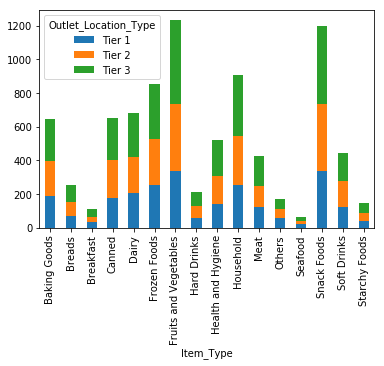

------------------------------------
Item_Type compared to Outlet_Type
------------------------------------
Catagorical vs Catagorical

Item_Type		Outlet_Type
Dairy %8
		 Supermarket Type1 %66
		 Supermarket Type2 %11
		 Grocery Store %13
		 Supermarket Type3 %10
Soft Drinks %5
		 Supermarket Type1 %67
		 Supermarket Type2 %10
		 Grocery Store %12
		 Supermarket Type3 %10
Meat %5
		 Supermarket Type1 %60
		 Supermarket Type2 %11
		 Grocery Store %16
		 Supermarket Type3 %13
Fruits and Vegetables %14
		 Supermarket Type1 %65
		 Supermarket Type2 %11
		 Grocery Store %12
		 Supermarket Type3 %11
Household %11
		 Supermarket Type1 %66
		 Supermarket Type2 %10
		 Grocery Store %13
		 Supermarket Type3 %11
Baking Goods %8
		 Supermarket Type1 %66
		 Supermarket Type2 %10
		 Grocery Store %13
		 Supermarket Type3 %11
Snack Foods %14
		 Supermarket Type1 %65
		 Supermarket Type2 %11
		 Grocery Store %12
		 Supermarket Type3 %11
Frozen Foods %10
		 Supermarket Type1 %67
		 Supermarket Type2 %1

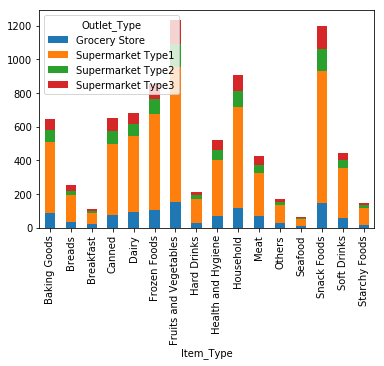

------------------------------------
Item_MRP compared to Outlet_Identifier
------------------------------------
Catagorical vs Continuous
F = 0.3075204970664311
p = 0.972774773041813


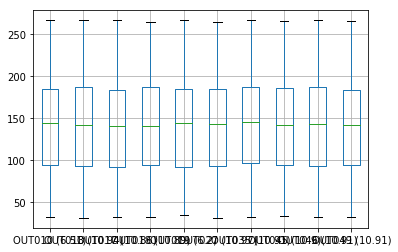

------------------------------------
Item_MRP compared to Outlet_Establishment_Year
------------------------------------
Continous vs Continous
Correlation: 0.005019916170235684


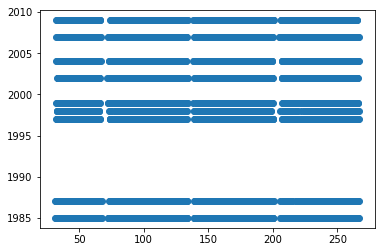

------------------------------------
Item_MRP compared to Outlet_Size
------------------------------------
Catagorical vs Continuous
F = 0.32038664358612945
p = 0.72588052426581


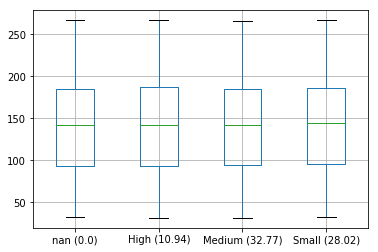

------------------------------------
Item_MRP compared to Outlet_Location_Type
------------------------------------
Catagorical vs Continuous
F = 0.016982651922798853
p = 0.9831607737157869


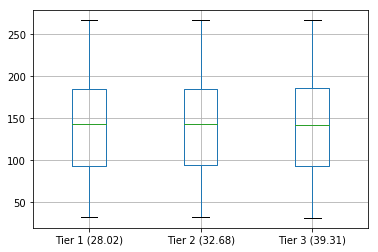

------------------------------------
Item_MRP compared to Outlet_Type
------------------------------------
Catagorical vs Continuous
F = 0.22025149361820012
p = 0.8823906488320122


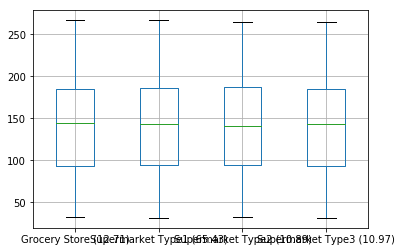

------------------------------------
Outlet_Identifier compared to Outlet_Establishment_Year
------------------------------------
Catagorical vs Continuous
F = inf
p = 0.0


c:\python\python35\lib\site-packages\scipy\stats\stats.py:2968: RuntimeWarning: divide by zero encountered in double_scalars
  f = msb / msw


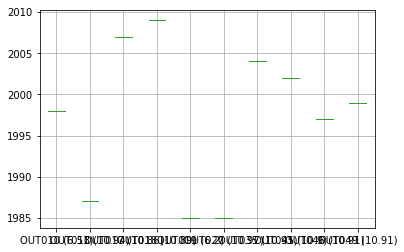

------------------------------------
Outlet_Identifier compared to Outlet_Size
------------------------------------
Catagorical vs Catagorical

Outlet_Identifier		Outlet_Size
OUT049 %11
		 Medium %100
		 High %0
		 Small %0
OUT018 %11
		 Medium %100
		 High %0
		 Small %0
OUT010 %7
		 Medium %0
		 High %0
		 Small %0
OUT013 %11
		 Medium %0
		 High %100
		 Small %0
OUT027 %11
		 Medium %100
		 High %0
		 Small %0
OUT045 %11
		 Medium %0
		 High %0
		 Small %0
OUT017 %11
		 Medium %0
		 High %0
		 Small %0
OUT046 %11
		 Medium %0
		 High %0
		 Small %100
OUT035 %11
		 Medium %0
		 High %0
		 Small %100
OUT019 %6
		 Medium %0
		 High %0
		 Small %100


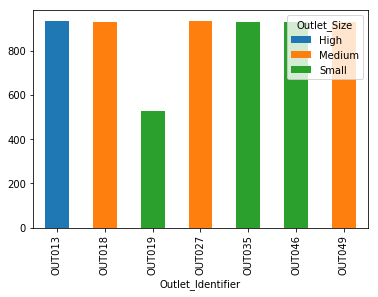

------------------------------------
Outlet_Identifier compared to Outlet_Location_Type
------------------------------------
Catagorical vs Catagorical

Outlet_Identifier		Outlet_Location_Type
OUT049 %11
		 Tier 1 %100
		 Tier 3 %0
		 Tier 2 %0
OUT018 %11
		 Tier 1 %0
		 Tier 3 %100
		 Tier 2 %0
OUT010 %7
		 Tier 1 %0
		 Tier 3 %100
		 Tier 2 %0
OUT013 %11
		 Tier 1 %0
		 Tier 3 %100
		 Tier 2 %0
OUT027 %11
		 Tier 1 %0
		 Tier 3 %100
		 Tier 2 %0
OUT045 %11
		 Tier 1 %0
		 Tier 3 %0
		 Tier 2 %100
OUT017 %11
		 Tier 1 %0
		 Tier 3 %0
		 Tier 2 %100
OUT046 %11
		 Tier 1 %100
		 Tier 3 %0
		 Tier 2 %0
OUT035 %11
		 Tier 1 %0
		 Tier 3 %0
		 Tier 2 %100
OUT019 %6
		 Tier 1 %100
		 Tier 3 %0
		 Tier 2 %0


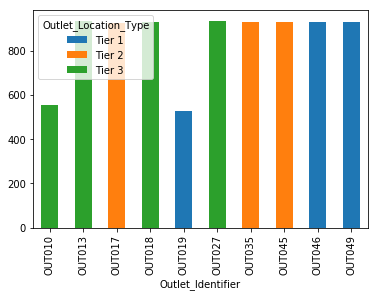

------------------------------------
Outlet_Identifier compared to Outlet_Type
------------------------------------
Catagorical vs Catagorical

Outlet_Identifier		Outlet_Type
OUT049 %11
		 Supermarket Type1 %100
		 Supermarket Type2 %0
		 Grocery Store %0
		 Supermarket Type3 %0
OUT018 %11
		 Supermarket Type1 %0
		 Supermarket Type2 %100
		 Grocery Store %0
		 Supermarket Type3 %0
OUT010 %7
		 Supermarket Type1 %0
		 Supermarket Type2 %0
		 Grocery Store %100
		 Supermarket Type3 %0
OUT013 %11
		 Supermarket Type1 %100
		 Supermarket Type2 %0
		 Grocery Store %0
		 Supermarket Type3 %0
OUT027 %11
		 Supermarket Type1 %0
		 Supermarket Type2 %0
		 Grocery Store %0
		 Supermarket Type3 %100
OUT045 %11
		 Supermarket Type1 %100
		 Supermarket Type2 %0
		 Grocery Store %0
		 Supermarket Type3 %0
OUT017 %11
		 Supermarket Type1 %100
		 Supermarket Type2 %0
		 Grocery Store %0
		 Supermarket Type3 %0
OUT046 %11
		 Supermarket Type1 %100
		 Supermarket Type2 %0
		 Grocery Store %0
		 Superma

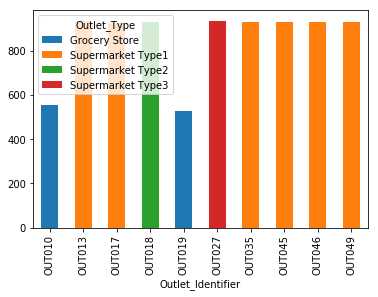

------------------------------------
Outlet_Establishment_Year compared to Outlet_Size
------------------------------------
Catagorical vs Continuous
F = 665.2269897160309
p = 4.16508486977196e-262


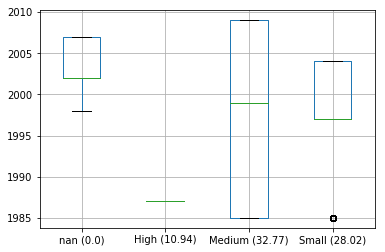

------------------------------------
Outlet_Establishment_Year compared to Outlet_Location_Type
------------------------------------
Catagorical vs Continuous
F = 1772.7935983702928
p = 0.0


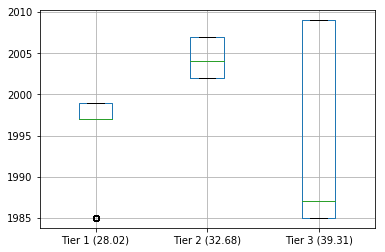

------------------------------------
Outlet_Establishment_Year compared to Outlet_Type
------------------------------------
Catagorical vs Continuous
F = 3351.4877273156544
p = 0.0


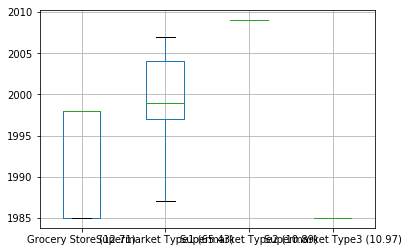

------------------------------------
Outlet_Size compared to Outlet_Location_Type
------------------------------------
Catagorical vs Catagorical

Outlet_Size		Outlet_Location_Type
Medium %33
		 Tier 1 %33
		 Tier 3 %67
		 Tier 2 %0
High %11
		 Tier 1 %0
		 Tier 3 %100
		 Tier 2 %0
Small %28
		 Tier 1 %61
		 Tier 3 %0
		 Tier 2 %39


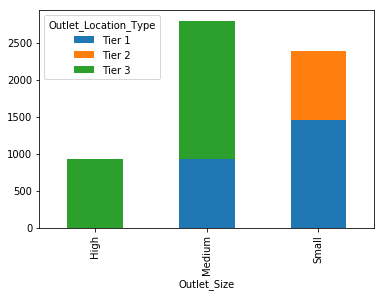

------------------------------------
Outlet_Size compared to Outlet_Type
------------------------------------
Catagorical vs Catagorical

Outlet_Size		Outlet_Type
Medium %33
		 Supermarket Type1 %33
		 Supermarket Type2 %33
		 Grocery Store %0
		 Supermarket Type3 %33
High %11
		 Supermarket Type1 %100
		 Supermarket Type2 %0
		 Grocery Store %0
		 Supermarket Type3 %0
Small %28
		 Supermarket Type1 %78
		 Supermarket Type2 %0
		 Grocery Store %22
		 Supermarket Type3 %0


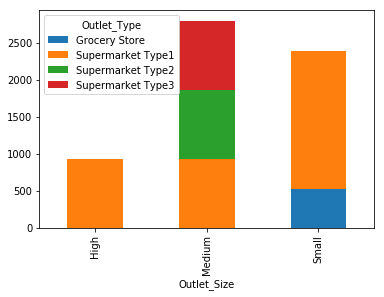

------------------------------------
Outlet_Location_Type compared to Outlet_Type
------------------------------------
Catagorical vs Catagorical

Outlet_Location_Type		Outlet_Type
Tier 1 %28
		 Supermarket Type1 %78
		 Supermarket Type2 %0
		 Grocery Store %22
		 Supermarket Type3 %0
Tier 3 %39
		 Supermarket Type1 %28
		 Supermarket Type2 %28
		 Grocery Store %17
		 Supermarket Type3 %28
Tier 2 %33
		 Supermarket Type1 %100
		 Supermarket Type2 %0
		 Grocery Store %0
		 Supermarket Type3 %0


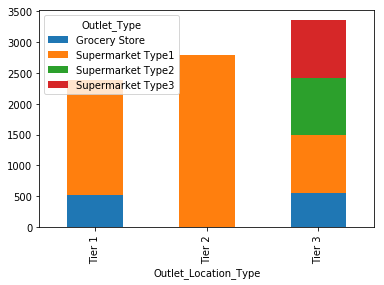

In [28]:
multi_analysis(train, is_cat)

In [29]:
#Notes on multi var analysis
"""
    ItemSales
        - Seems from graph item visability is bad over %20 strange
        - there is a corelation between item type
        - no real correlation for MRP though acts a ceiling for possible earnings
        - high correlation between Outlet and sale price(diff places may sell dif types though)
        - outlet size does have correlation
        - outlet location does have correlation
        - outlet type also has correlation
        
"""

'\n    ItemSales\n        - Seems from graph item visability is bad over %20 strange\n        - there is a corelation between item type\n        - no real correlation for MRP though acts a ceiling for possible earnings\n        - high correlation between Outlet and sale price(diff places may sell dif types though)\n        - outlet size does have correlation\n        - outlet location does have correlation\n        - outlet type also has correlation\n        \n'

In [31]:
# nan clean up
train.isnull().sum()

Item_Outlet_Sales               0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [32]:
#outlet size does have correlation with Item_sales so may interpolate latter
#      for now use a col to describe if it is present
#Item Weight doesnt seem to have any effect so just give it the mean for now


In [36]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace=True)

In [42]:
train['Outlet_Size'].unique()
train['Outlet_Size'].fillna('Nan', inplace=True)

In [43]:
train.isnull().sum()

Item_Outlet_Sales            0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [ ]:
#finished general preprocessing